In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
RawData = pd.read_csv("df_file.csv")
pd.set_option('max_colwidth', 150)
RawData.head()


,Text,Label
0,Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he de...,0
1,Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n...,0
2,Howard denies split over ID cards\n \n Michael Howard has denied his shadow cabinet was split over its decision to back controversial Labour plans...,0
3,Observers to monitor UK election\n \n Ministers will invite international observers to check the forthcoming UK general election is fairly run.\n ...,0
4,Kilroy names election seat target\n \n Ex-chat show host Robert Kilroy-Silk is to contest the Derbyshire seat of Erewash at the next general elect...,0


In [2]:
import re
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

STOP_WORDS = stopwords.words('english')
wnLem = WordNetLemmatizer()

def cleanText(token):
    return re.sub(r'[^A-Za-z0-9]', "", token.lower())

def lemText(word):
    return wnLem.lemmatize(word)

def removeStop(word):
    return word not in STOP_WORDS

#Could be optimized into one very concise line for speed, however opted for readability.
#cleaned_tokens = [porterStem.stem(re.sub(r'[^A-Za-z0-9]', "", token.lower())) for token in word_tokenize(text) if token.strip() and token.lower() not in STOP_WORDS]
def cleanAndTokenize(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [lemText(cleanText(token)) for token in tokens if token.strip() and removeStop(token)]
    return cleaned_tokens

# Tokenized = RawData['Text'].apply(cleanAndTokenize)
# Tokenized.head()

In [3]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return (count/(len(text) - text.count(" ")) * 100)

RawData['punct%'] = RawData['Text'].apply(lambda text: count_punct(text))

RawData.head()


,Text,Label,punct%
0,Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he de...,0,2.732871
1,Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n...,0,2.140309
2,Howard denies split over ID cards\n \n Michael Howard has denied his shadow cabinet was split over its decision to back controversial Labour plans...,0,3.090424
3,Observers to monitor UK election\n \n Ministers will invite international observers to check the forthcoming UK general election is fairly run.\n ...,0,2.583880
4,Kilroy names election seat target\n \n Ex-chat show host Robert Kilroy-Silk is to contest the Derbyshire seat of Erewash at the next general elect...,0,4.055300


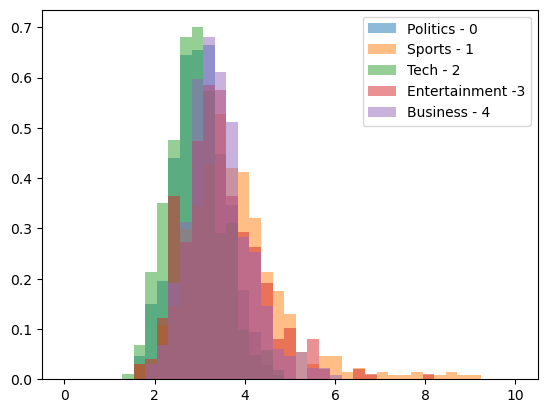

In [4]:
from matplotlib import pyplot
import numpy as np 

%matplotlib inline

bins = np.linspace(0, 10, 40)

pyplot.hist(RawData[RawData['Label'] == 0]['punct%'], bins, alpha=0.5, density=True, label = 'Politics - 0')
pyplot.hist(RawData[RawData['Label'] == 1]['punct%'], bins, alpha=0.5, density=True, label = 'Sports - 1')
pyplot.hist(RawData[RawData['Label'] == 2]['punct%'], bins, alpha=0.5, density=True, label = 'Tech - 2')
pyplot.hist(RawData[RawData['Label'] == 3]['punct%'], bins, alpha=0.5, density=True, label = 'Entertainment -3')
pyplot.hist(RawData[RawData['Label'] == 4]['punct%'], bins, alpha=0.5, density=True, label = 'Business - 4')

pyplot.legend(loc='upper right')
pyplot.show()


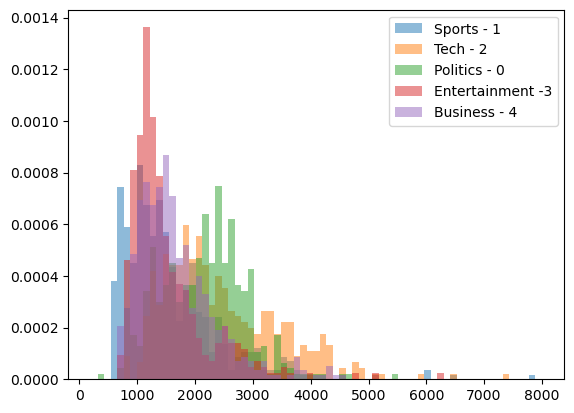

In [5]:
RawData['Text-Len'] = RawData['Text'].apply(lambda text: len(text) - text.count(" "))

bins2 = np.linspace(200, 8000, 70)

pyplot.hist(RawData[RawData['Label'] == 1]['Text-Len'], bins2, alpha=0.5, density=True, label = 'Sports - 1')
pyplot.hist(RawData[RawData['Label'] == 2]['Text-Len'], bins2, alpha=0.5, density=True, label = 'Tech - 2')
pyplot.hist(RawData[RawData['Label'] == 0]['Text-Len'], bins2, alpha=0.5, density=True, label = 'Politics - 0')
pyplot.hist(RawData[RawData['Label'] == 3]['Text-Len'], bins2, alpha=0.5, density=True, label = 'Entertainment -3')
pyplot.hist(RawData[RawData['Label'] == 4]['Text-Len'], bins2, alpha=0.5, density=True, label = 'Business - 4')

pyplot.legend(loc='upper right')
pyplot.show()

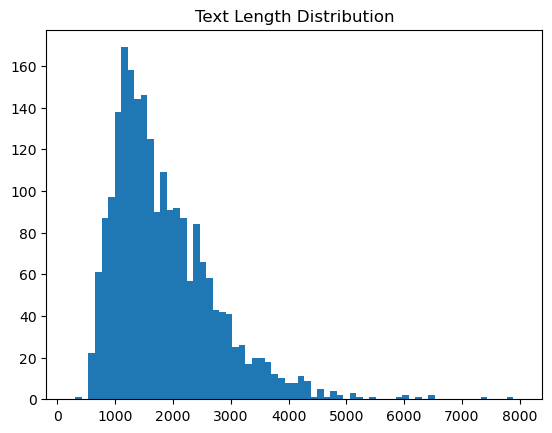

In [6]:
bins3 = np.linspace(200, 8000, 70)

pyplot.hist(RawData['Text-Len'], bins3)
pyplot.title("Text Length Distribution")
pyplot.show()

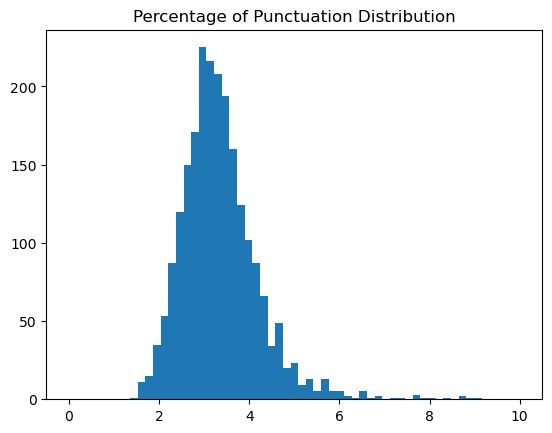

In [7]:
bins3 = np.linspace(0, 10, 60)

pyplot.hist(RawData['punct%'], bins3)
pyplot.title("Percentage of Punctuation Distribution")
pyplot.show()

In [8]:
# for i in range(1, 11):
#     pyplot.hist((RawData['Text-Len']) ** (1/i), bins= 60)
#     pyplot.title(f'Text-Len Transformation 1/{i}')
#     pyplot.show()


# for i in range(1,11):
#     pyplot.hist(RawData['punct%'] ** (1/i), bins = 60)
#     pyplot.title(f'Punct% Transformation 1/{i}')
#     pyplot.show()


RawData['Transformed Punct'] = RawData['punct%'].apply(lambda x: x ** (1/8))
RawData['Transformed Text-Len'] = RawData['Text-Len'].apply(lambda x: x** (1/5))

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(RawData[['Text', 'Transformed Text-Len', 'Transformed Punct']], RawData['Label'], test_size=0.2)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVect = TfidfVectorizer(analyzer = cleanAndTokenize)

X_TFIDF_fit = tfidfVect.fit(X_train['Text'])

X_Train_TFIDF = X_TFIDF_fit.transform(X_train['Text'])
X_Test_TFIDF = X_TFIDF_fit.transform(X_test['Text'])

In [12]:
X_train_vect = pd.concat([X_train[['Transformed Text-Len', 'Transformed Punct']].reset_index(drop=True),
                          pd.DataFrame(X_Train_TFIDF.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Transformed Text-Len', 'Transformed Punct']].reset_index(drop=True),
                          pd.DataFrame(X_Test_TFIDF.toarray())], axis=1)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [16]:
rf = RandomForestClassifier(n_estimators=125, max_depth=50, n_jobs=-1)

X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

precision_list = []
recall_list = []
accuracy_list = []

start = time.time()
rf_model = rf.fit(X_train_vect, Y_train)
end = time.time()

fit_time = end - start

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()

pred_time = end - start

precision, recall, fscore, train_support = score(Y_test, y_pred, average='micro')

precision_list.append(precision)
recall_list.append(recall)
accuracy_list.append(round((y_pred == Y_test).sum()/(len(Y_test)), 3))

print(f'Precision: {round(precision, 3)} / Recall: {round(recall, 3)} / Accuracy: {round((y_pred == Y_test).sum()/(len(Y_test)), 3)}')
print(f'Fit time: {fit_time} / Predict time: {pred_time}')

Precision: 0.971 / Recall: 0.971 / Accuracy: 0.971
Fit time: 1.5885682106018066 / Predict time: 0.28504395484924316
